**2) Categorical Plots**

- Categorical scatterplots - Show each observation at each level of the categorical variable
    - stripplot()
    - swarmplot()
    
- Categorical distribution plots - Show an abstract representation of each distribution of observations.
    - boxplot()
    - violinplot()
    - boxenplot()

- Categorical estimate plots - Apply a statistical estimation to show a measure of central tendency and confidence intervals
    - barplot()
    - countplot()
    - pointplot()

We also show and discuss a type of plot known as `catplot` (a.k.a. factorplot)

In [3]:
import seaborn as sns
%matplotlib inline

C:\Users\asuch\miniconda3\envs\dss-part1\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**2.1) Categorical scatterplots**
2.1.1 - stripplot provides a simple way to show the values of some quantitative variable across the level of a categorical variable. It draws a scatterplot where one variable is categorical.

Lets plot the `total_bill` for each day of the week 

<AxesSubplot: xlabel='day', ylabel='total_bill'>

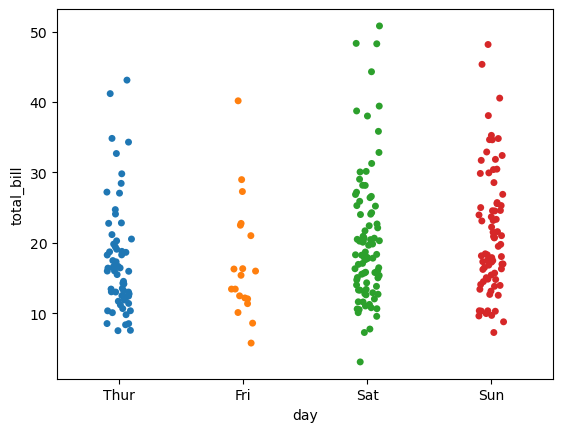

In [5]:
sns.stripplot(x='day', y='total_bill', data=tips)

Its hard to see the full distribution due to overlap. The `jitter` parameter helps with this (`jitter=True` provides a good random default).
Lets also add a nested categorical variable, 'sex'

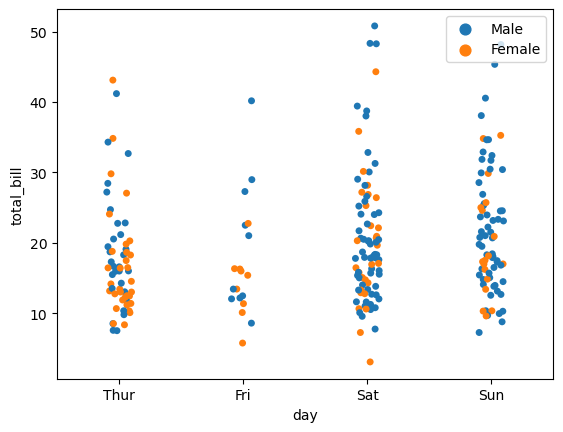

In [6]:
ax = sns.stripplot(x='day', y='total_bill', data=tips, jitter=True, hue='sex')
ax.legend(loc='upper right')

2.1.2) swarmplot()
swarmplot() is similar to stripplot but it uses a different approach to avoid the overlapping issue in datapoints along the categorical axis by using a different algorithm.
Please note that swarmplot() does not scale well to large numbers of observations

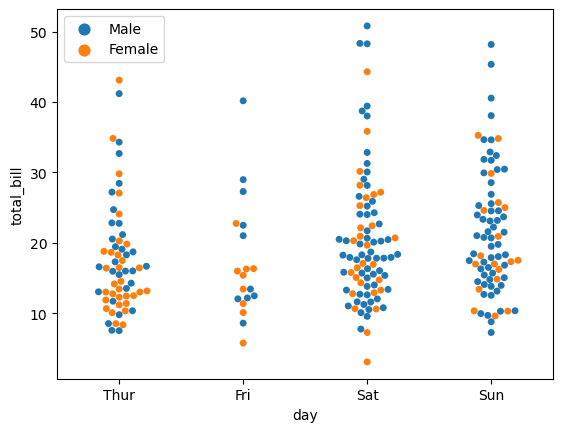

In [7]:
ax = sns.swarmplot(x='day', y='total_bill', data=tips, hue='sex')
ax.legend(loc=2)

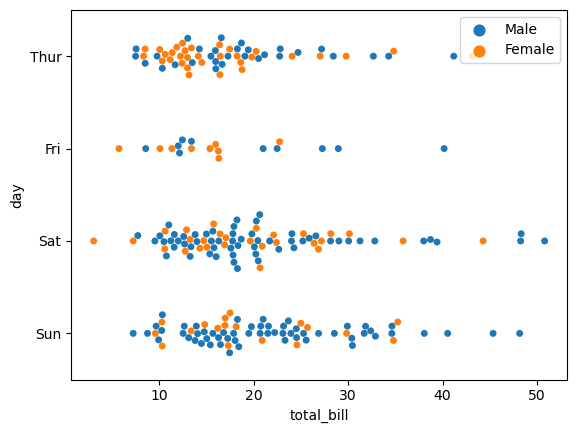

In [8]:
# we can also place the categorical variable along the vertical axis if the names are long
ax = sns.swarmplot(y='day', x='total_bill', data=tips, hue='sex')
ax.legend(loc=1)

**2.2) Categorical distribution plots**
2.2.1) boxplots()

a.k.a box and whisker plots
- Shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable.

<AxesSubplot: xlabel='day', ylabel='total_bill'>

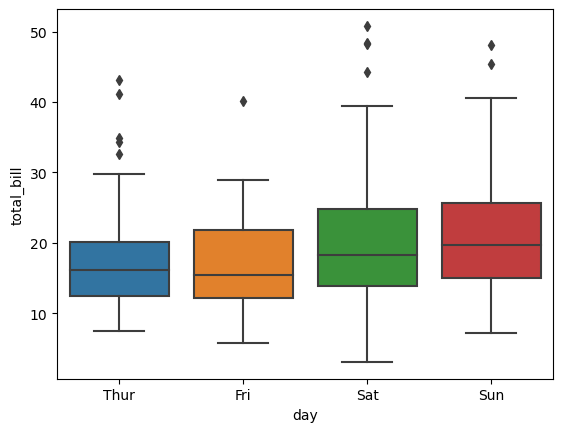

In [9]:
sns.boxplot(x='day', y='total_bill', data=tips)

We have `total_bill` along Y and category 'day' along X. If we look at any one of the box, we see the data point in each box. The box/box-and-whisker plot are divided into four quartile groups.
Quartile 1: between the bottom whisker and bottom of the box
Quartile 2: between the bottom of the box and the median line in the box
Quartile 3: between the median line and the top of the box
Quartile 4: between top of the box and top whisker

Points outside the quartiles are outliers.


<AxesSubplot: xlabel='day', ylabel='total_bill'>

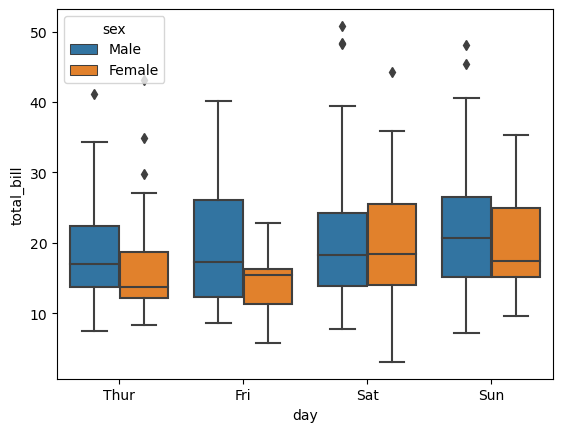

In [10]:
# lets add a nested categorical variable again using hue
sns.boxplot(x='day', y='total_bill', data=tips, hue='sex')

2.2.2) violinplot()
The violinplot draws a combination of boxplot and kernel density estimate.
It plays a similar role to boxplot

<AxesSubplot: xlabel='day', ylabel='total_bill'>

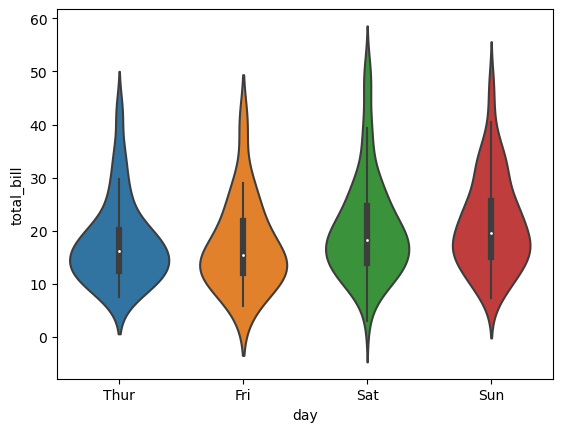

In [11]:
sns.violinplot(x='day', y='total_bill', data=tips)

You can see that theres a boxplot inside each violinplot
Unlike boxplot, violinplot allows us to plot all the components that correspond to actual data points.
The violinplot is actually showing the kde of the underlying distribution.
Violinplots are a bit harder to read however.

<AxesSubplot: xlabel='day', ylabel='total_bill'>

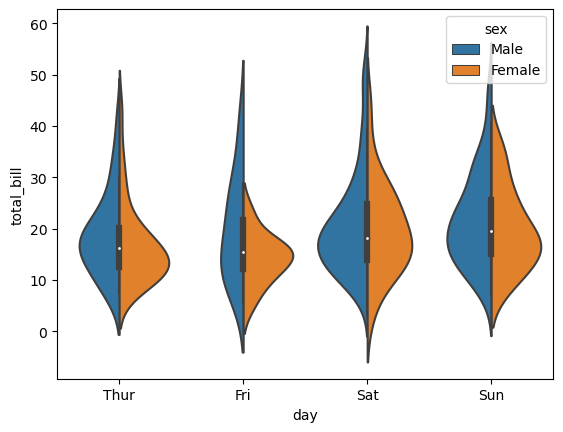

In [12]:
# lets introduce the hue parameter again along with a split parameter
# this will draw half of a violin for each level to make it easier to compare the nested category
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', split=True)

2.2.3) boxenplot()
this type of boxplot draws more quartiles that are defined by letters

<AxesSubplot: xlabel='total_bill'>

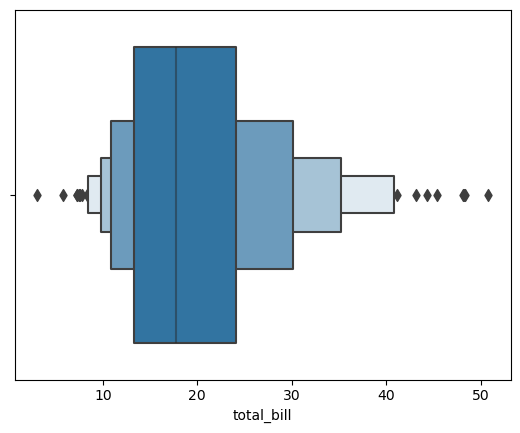

In [13]:
sns.boxenplot(x=tips['total_bill'])

Lets try drawing one more using two variables

<AxesSubplot: xlabel='day', ylabel='total_bill'>

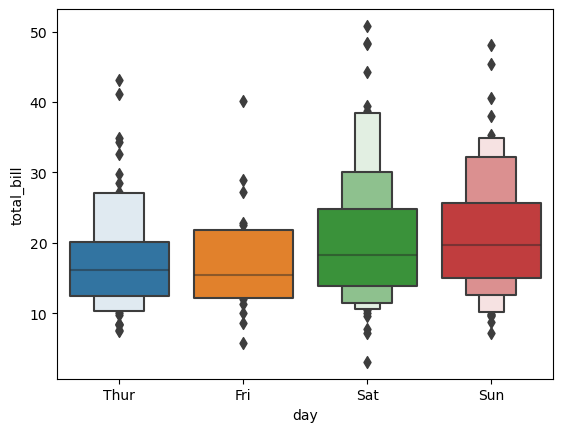

In [14]:
sns.boxenplot(x='day', y='total_bill', data=tips)

<AxesSubplot: xlabel='day', ylabel='total_bill'>

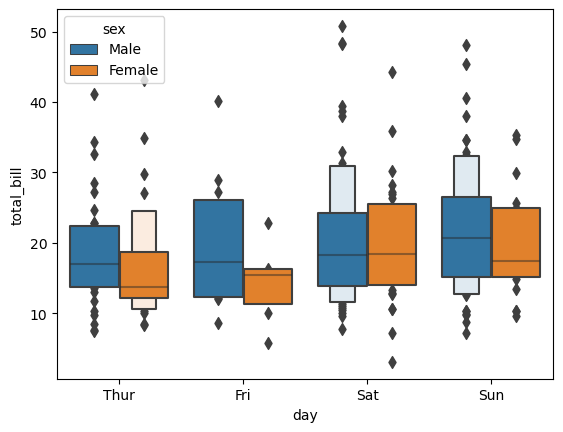

In [15]:
# lets again try adding a nested categorical variable
sns.boxenplot(x='day', y='total_bill', data=tips, hue='sex')

**2.3) Categorical estimate plots**
Often, rather than showing the distribution within each category, you might want to show the central tendency of the values.

2.3.1) barplots
barplot() is a general plot that allows us to aggregate the categorical data based on some function (usually the mean)

<AxesSubplot: xlabel='day', ylabel='total_bill'>

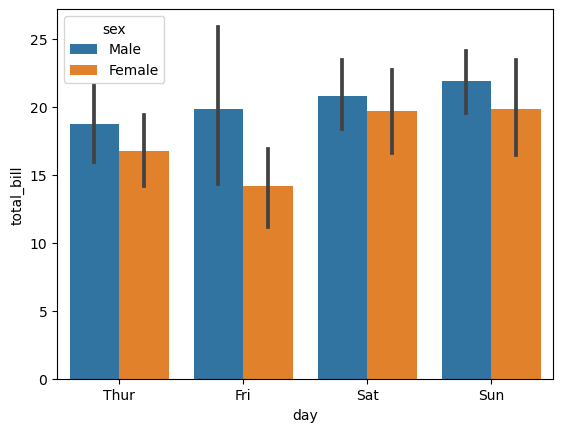

In [16]:
sns.barplot(x='day', y='total_bill', hue='sex', data=tips)

<AxesSubplot: xlabel='day', ylabel='total_bill'>

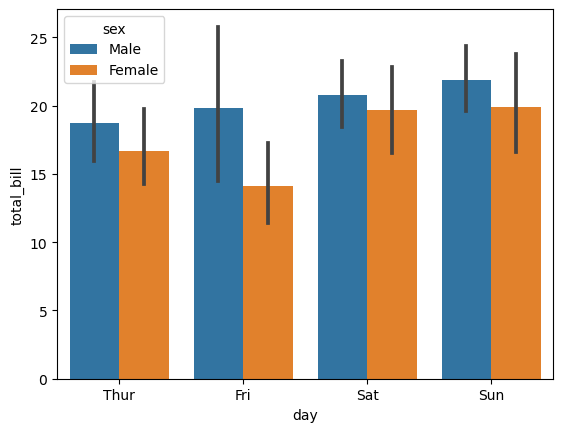

In [18]:
import numpy as np
sns.barplot(x='day', y='total_bill', data=tips, hue='sex')

In the plot above, along y, we get mean of the total_bill paid by male in blue, and female in orage. We can change the estimator object to our own function. Lets say we want to use the std:-

<AxesSubplot: xlabel='day', ylabel='total_bill'>

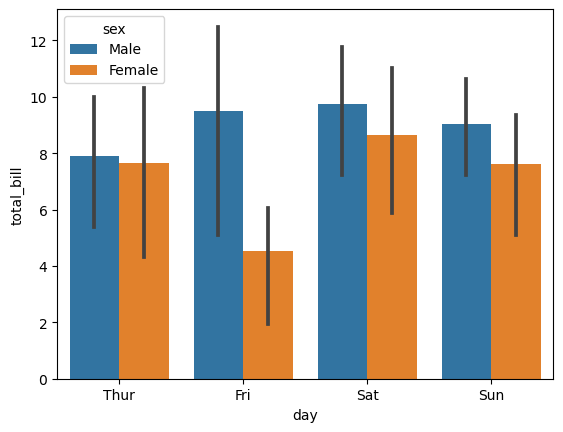

In [19]:
sns.barplot(x='day', y='total_bill', data=tips, hue='sex', estimator=np.std)

2.3.2) countplot()

A special case for the bar plot is when we want to show the number of observations in each category rather than computing a statistic for a second variable.

This is similar to a histogram over a categorical (rather than quantative) variable

This is same as barplot except the estimator is counting the number of occurences. Which is why we only pass the x value.

<AxesSubplot: xlabel='day', ylabel='count'>

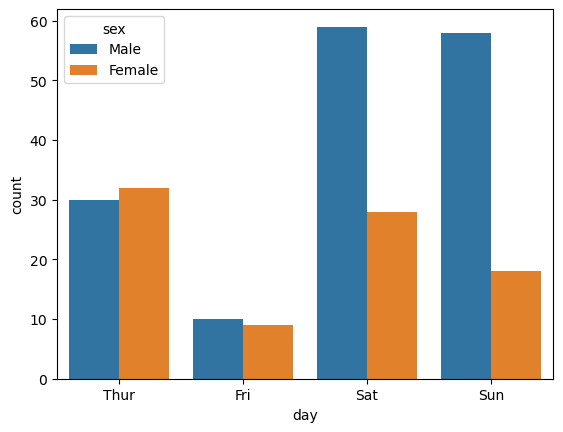

In [20]:
sns.countplot(x='day', hue='sex', data=tips)

2.3.3) pointplot

An alternative style for visualyzing the same information (as barplot). Rather than showing a full bar, it just plots the point estimate and confidence interval.

(0.0, 30.0)

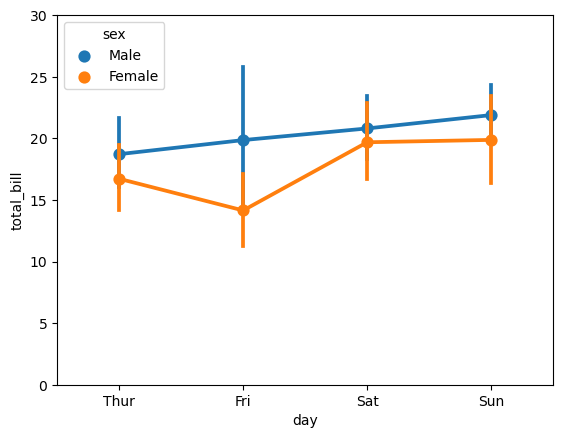

In [21]:
sns.pointplot(x='day', y='total_bill', data=tips, hue='sex')

import matplotlib.pyplot as plt
plt.ylim(0, 30)

(0.0, 30.0)

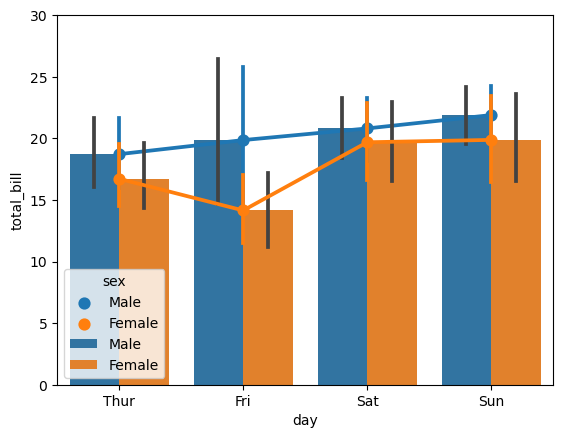

In [22]:
# we can also combine categorical plots
sns.barplot(x='day', y='total_bill', data=tips, hue='sex')
sns.pointplot(x='day', y='total_bill', data=tips, hue='sex')
plt.ylim(0, 30)

Good to know:- catplot()

catplot is just a general method for drawing categorical plots.
It accepts a `kind` parameter (i.e. box, swarm, violin, bar etc.)

The main advantage is that its easier to facet and investigate the role of other categorical variables.

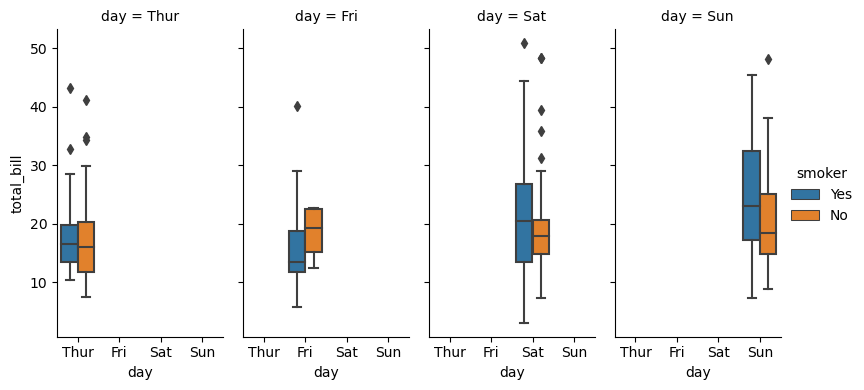

In [23]:
sns.catplot(x='day', y='total_bill', hue='smoker', col='day',
           data=tips, kind='box', height=4, aspect=0.5)